In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

os.chdir("..")
data = np.loadtxt(('data/preprocessed-dataset.csv'), delimiter=',', skiprows=1)
os.chdir("methods")
x = data[:,1:35]
y = data[:,35]

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

b_model=BaggingClassifier(bootstrap=False, max_features=3, max_samples=0.5, n_estimators=80)
b_model.fit(x_train, y_train)
y_predict=b_model.predict(x_test)
b_acc=(accuracy_score(y_test, y_predict))

gb_model=GradientBoostingClassifier(learning_rate=0.1, max_depth=4, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=70)
gb_model.fit(x_train, y_train)
y_predict=gb_model.predict(x_test)
gb_acc=(accuracy_score(y_test, y_predict))

knn = KNeighborsClassifier(59) 
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc=(accuracy_score(y_test, y_predict))

logr_model=LogisticRegression(C=0.001, max_iter=500, penalty='none', solver='sag')
logr_model.fit(x_train, y_train)
y_predict=logr_model.predict(x_test)
logr_acc=(accuracy_score(y_test, y_predict))

nb_model=GaussianNB(priors=None, var_smoothing=0.0001)
nb_model.fit(x_train, y_train)
y_predict=nb_model.predict(x_test)
nb_acc=(accuracy_score(y_test, y_predict))

p_model=Perceptron(eta0= 0.001, penalty='l2', tol=0.001)
p_model.fit(x_train, y_train)
y_predict=p_model.predict(x_test)
p_acc=(accuracy_score(y_test, y_predict))

rf_model=RandomForestClassifier(bootstrap=True, max_depth=4, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=20)
rf_model.fit(x_train, y_train)
y_predict=rf_model.predict(x_test)
rf_acc=(accuracy_score(y_test, y_predict))

r_model=RidgeClassifier(alpha=1)
r_model.fit(x_train, y_train)
y_predict=r_model.predict(x_test)
r_acc=(accuracy_score(y_test, y_predict))

svm_model = svm.SVC(kernel='linear', gamma=1, C=100)
svm_model.fit(x_train, y_train)
y_predict=svm_model.predict(x_test)
svm_acc=(accuracy_score(y_test, y_predict))
svm_cm=confusion_matrix(y_test, y_predict)

dtree_model = DecisionTreeClassifier(ccp_alpha=0.0, criterion='gini', max_depth=9, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
dtree_model.fit(x_train, y_train)
y_predict = dtree_model.predict(x_test)
dtree_acc=(accuracy_score(y_test, y_predict))

print(svm_cm)


c:\Users\orlan\Desktop\Python ENV\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
c:\Users\orlan\Desktop\Python ENV\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[[228  35]
 [ 16 290]]


In [4]:
wd_nn=0.9050966501235962
d_nn=0.8980667591094971

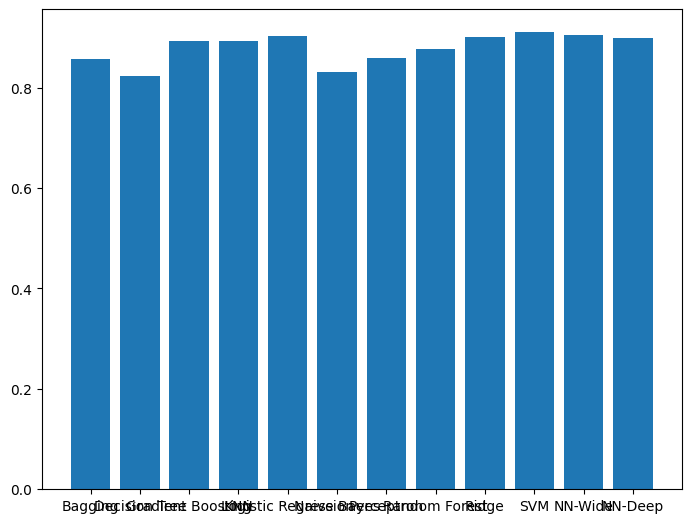

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
method = ["Bagging", "Decision Tree", "Gradient Boosting", "KNN", "Logistic Regression", "Naive Bayes", "Perceptron", "Random Forest", "Ridge", "SVM", "NN-Wide", "NN-Deep"]
accuracy = [b_acc, dtree_acc, gb_acc, knn_acc, logr_acc, nb_acc, p_acc, rf_acc, r_acc, svm_acc, wd_nn, d_nn]
ax.bar(method,accuracy)
plt.show()

In [6]:
# initialise data of lists.
data = {'Method':method, 'Accuracy':accuracy}
 
# Create DataFrame
df = pd.DataFrame(data)
df

,Method,Accuracy
0,Bagging,0.855888
1,Decision Tree,0.822496
2,Gradient Boosting,0.892794
3,KNN,0.892794
4,Logistic Regression,0.903339
5,Naive Bayes,0.831283
6,Perceptron,0.859402
7,Random Forest,0.876977
8,Ridge,0.899824
9,SVM,0.910369


<Figure size 640x480 with 0 Axes>

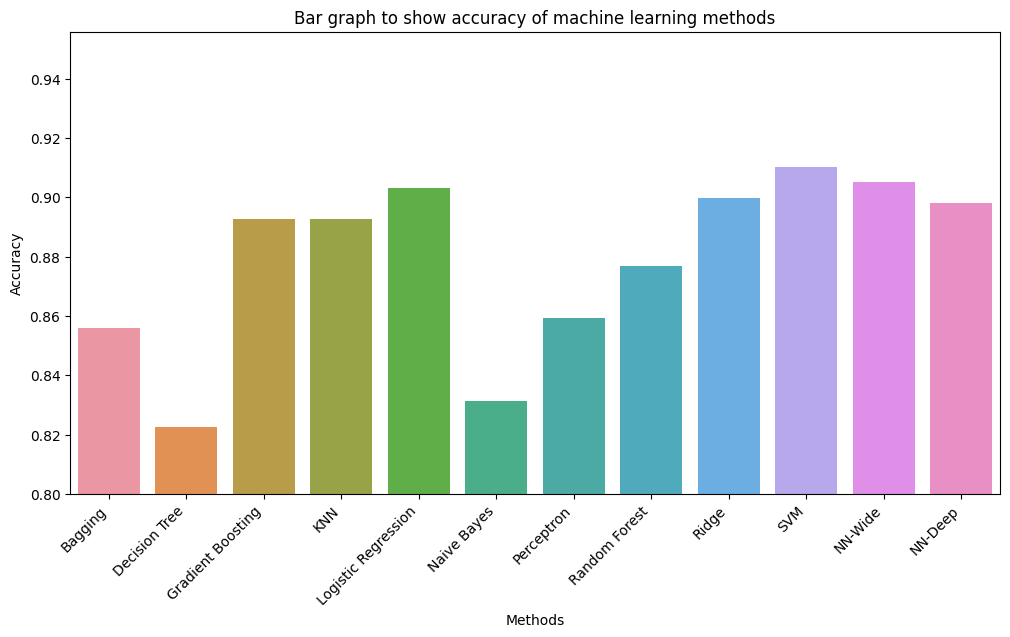

<Figure size 640x480 with 0 Axes>

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=data, x="Method", y="Accuracy", ax=ax).set(title='Bar graph to show accuracy of machine learning methods', xlabel='Methods', ylabel='Accuracy')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(0.8)
plt.figure()

<Figure size 640x480 with 0 Axes>

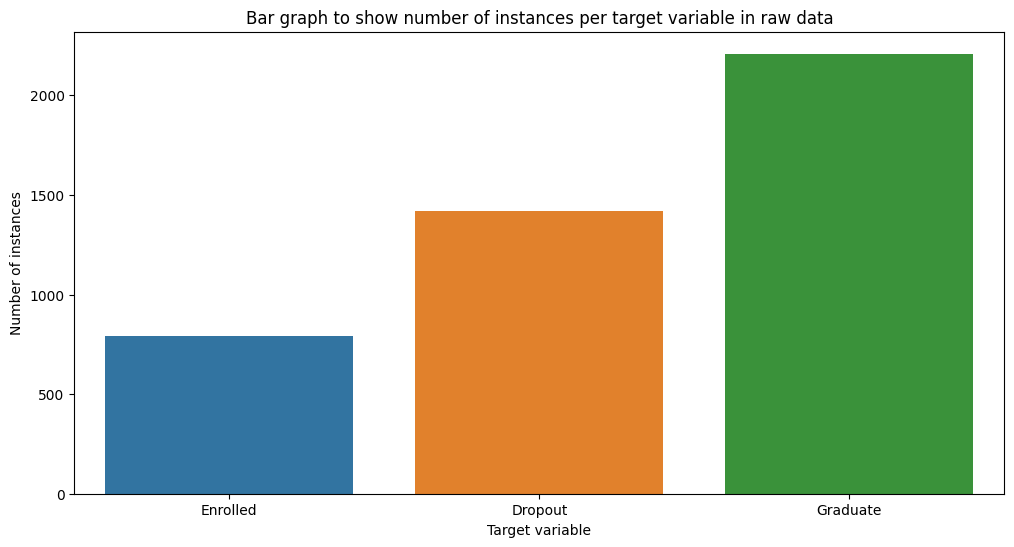

<Figure size 640x480 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
data={"Target Variable":["Enrolled", "Dropout", "Graduate"], "Instances": [794, 1421,2209]}
sns.barplot(data=data, x="Target Variable", y="Instances", ax=ax).set(title='Bar graph to show number of instances per target variable in raw data', xlabel='Target variable', ylabel='Number of instances')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.figure()


<Figure size 640x480 with 0 Axes>

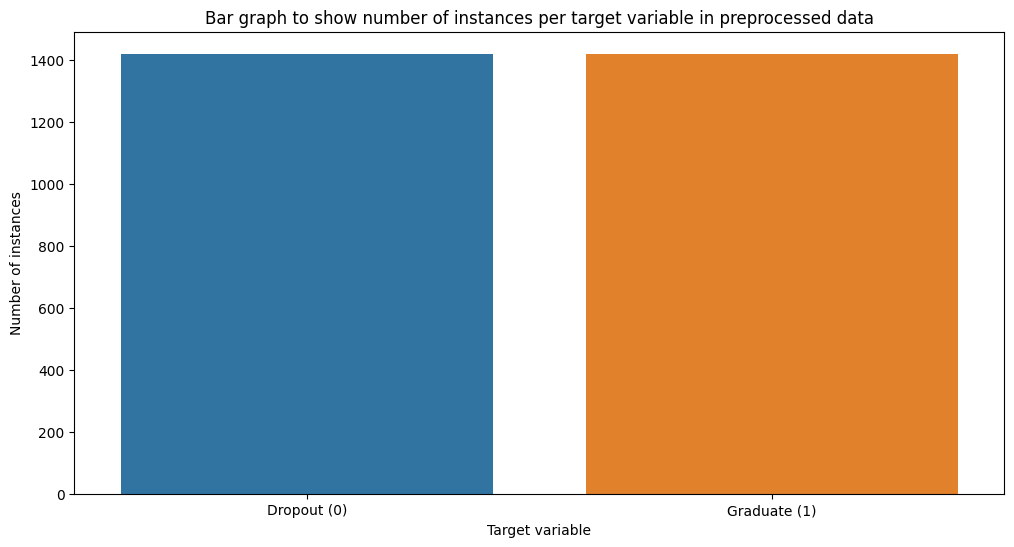

<Figure size 640x480 with 0 Axes>

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
data={"Target Variable":["Dropout (0)", "Graduate (1)"], "Instances": [1421, 1421]}
sns.barplot(data=data, x="Target Variable", y="Instances", ax=ax).set(title='Bar graph to show number of instances per target variable in preprocessed data', xlabel='Target variable', ylabel='Number of instances')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.figure()

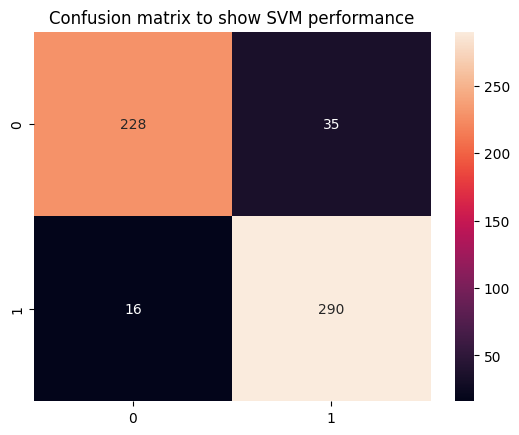

In [17]:
array = [[int(228),35], [int(16),290]]

DetaFrame_cm = pd.DataFrame(array)
sns.heatmap(array, annot=True, fmt='g').set(title="Confusion matrix to show SVM performance")
plt.show()